<a href="https://colab.research.google.com/github/ch2kings/AirKING/blob/master/DataAnalytics%20Hotel%20Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency

# Function to perform t-test for numerical variables
def perform_t_test(df, column, target='booking_status'):
    group1 = df[df[target] == 'Canceled'][column]
    group2 = df[df[target] == 'Not_Canceled'][column]
    t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit', equal_var=False)  # Welch's t-test
    return t_stat, p_value

# Function to perform chi-square test for categorical variables
def perform_chi2_test(df, column, target='booking_status'):
    contingency_table = pd.crosstab(df[column], df[target])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    return chi2_stat, p_value

# Load your dataset here
# df = pd.read_csv('path_to_your_dataset.csv')

# Replace with the path to your dataset
df = pd.read_csv('/content/Dataset-Hotel+Booking+Cancellation+Prediction.csv')

# Performing hypothesis testing for all variables
results = {}
significance_level = 0.05

for column in df.columns:
    if df[column].dtype in ['int64', 'float64'] and column != 'arrival_year':
        t_stat, p_value = perform_t_test(df, column)
        results[column] = {'Test': 't-test', 'Statistic': t_stat, 'p-value': p_value, 'Reject H0': p_value < significance_level}
    elif df[column].dtype == 'object' and column != 'booking_status':
        chi2_stat, p_value = perform_chi2_test(df, column)
        results[column] = {'Test': 'chi-square', 'Statistic': chi2_stat, 'p-value': p_value, 'Reject H0': p_value < significance_level}

# Convert results to DataFrame for better visualization
hypothesis_test_results_df = pd.DataFrame(results).T
print(hypothesis_test_results_df)



                                            Test  Statistic   p-value  \
Booking_ID                            chi-square     9069.0  0.495063   
no_of_adults                              t-test   8.899508       0.0   
no_of_children                            t-test   2.663272  0.007761   
no_of_weekend_nights                      t-test   5.394564       0.0   
no_of_week_nights                         t-test   9.490767       0.0   
type_of_meal_plan                     chi-square  69.170777       0.0   
required_car_parking_space                t-test -10.884821       0.0   
room_type_reserved                    chi-square   9.341148  0.155282   
lead_time                                 t-test   40.66194       0.0   
arrival_month                             t-test  -2.382849  0.017205   
arrival_date                              t-test   0.796098  0.426007   
market_segment_type                   chi-square  196.85951       0.0   
repeated_guest                            t-test -1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 1, Accuracy: 0.7206909224549798
Iteration 2, Accuracy: 0.7853730246233003


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 3, Accuracy: 0.7842704887908857
Iteration 4, Accuracy: 0.7997059904446895


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 5, Accuracy: 0.7938257993384785
Iteration 6, Accuracy: 0.8059536934950385


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 7, Accuracy: 0.7993384785005513


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 8, Accuracy: 0.808893789048144


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 9, Accuracy: 0.8037486218302095


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 10, Accuracy: 0.8070562293274531


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 11, Accuracy: 0.8037486218302095


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 12, Accuracy: 0.8096288129364204


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 13, Accuracy: 0.8063212054391767


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 14, Accuracy: 0.8099963248805586
Iteration 15, Accuracy: 0.8063212054391767
Iteration 16, Accuracy: 0.8099963248805586


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 17, Accuracy: 0.8033811098860713
Iteration 18, Accuracy: 0.8059536934950385


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 19, Accuracy: 0.8052186696067622


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 20, Accuracy: 0.8044836457184859
Iteration 21, Accuracy: 0.8033811098860713


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 22, Accuracy: 0.8044836457184859


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 23, Accuracy: 0.8070562293274531


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 24, Accuracy: 0.8044836457184859


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 25, Accuracy: 0.804851157662624


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 26, Accuracy: 0.8044836457184859


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 27, Accuracy: 0.8044836457184859


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 28, Accuracy: 0.8037486218302095
Iteration 29, Accuracy: 0.804851157662624


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 30, Accuracy: 0.8041161337743477
Iteration 31, Accuracy: 0.8044836457184859


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 32, Accuracy: 0.8041161337743477


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 33, Accuracy: 0.8044836457184859
Iteration 34, Accuracy: 0.8041161337743477


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 35, Accuracy: 0.8041161337743477
Iteration 36, Accuracy: 0.8041161337743477


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 37, Accuracy: 0.8044836457184859


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 38, Accuracy: 0.8041161337743477
Iteration 39, Accuracy: 0.8044836457184859
Iteration 40, Accuracy: 0.8041161337743477


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 41, Accuracy: 0.8044836457184859
Iteration 42, Accuracy: 0.804851157662624
Iteration 43, Accuracy: 0.804851157662624


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 44, Accuracy: 0.804851157662624
Iteration 45, Accuracy: 0.804851157662624
Iteration 46, Accuracy: 0.804851157662624


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 47, Accuracy: 0.8044836457184859
Iteration 48, Accuracy: 0.802646085997795
Iteration 49, Accuracy: 0.8044836457184859


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 50, Accuracy: 0.8030135979419332
Iteration 51, Accuracy: 0.8037486218302095
Iteration 52, Accuracy: 0.8074237412715913


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 53, Accuracy: 0.8037486218302095
Iteration 54, Accuracy: 0.8081587651598677
Iteration 55, Accuracy: 0.8037486218302095


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 56, Accuracy: 0.8066887173833149
Iteration 57, Accuracy: 0.8037486218302095
Iteration 58, Accuracy: 0.8059536934950385


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 59, Accuracy: 0.8037486218302095
Iteration 60, Accuracy: 0.8052186696067622
Iteration 61, Accuracy: 0.8041161337743477


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 62, Accuracy: 0.8055861815509004
Iteration 63, Accuracy: 0.8041161337743477
Iteration 64, Accuracy: 0.8055861815509004


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 65, Accuracy: 0.8041161337743477
Iteration 66, Accuracy: 0.8059536934950385
Iteration 67, Accuracy: 0.8041161337743477


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 68, Accuracy: 0.8052186696067622
Iteration 69, Accuracy: 0.8041161337743477
Iteration 70, Accuracy: 0.8059536934950385


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 71, Accuracy: 0.8037486218302095
Iteration 72, Accuracy: 0.8066887173833149
Iteration 73, Accuracy: 0.8037486218302095


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 74, Accuracy: 0.8077912532157295
Iteration 75, Accuracy: 0.8037486218302095
Iteration 76, Accuracy: 0.8070562293274531


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 77, Accuracy: 0.8037486218302095
Iteration 78, Accuracy: 0.8092613009922822
Iteration 79, Accuracy: 0.8037486218302095


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 80, Accuracy: 0.8044836457184859
Iteration 81, Accuracy: 0.8037486218302095


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 82, Accuracy: 0.8030135979419332
Iteration 83, Accuracy: 0.8041161337743477
Iteration 84, Accuracy: 0.802646085997795


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 85, Accuracy: 0.8037486218302095
Iteration 86, Accuracy: 0.802646085997795


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 87, Accuracy: 0.8037486218302095
Iteration 88, Accuracy: 0.802646085997795


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 89, Accuracy: 0.8037486218302095
Iteration 90, Accuracy: 0.8033811098860713


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 91, Accuracy: 0.8037486218302095
Iteration 92, Accuracy: 0.8033811098860713


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 93, Accuracy: 0.8037486218302095
Iteration 94, Accuracy: 0.8037486218302095


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 95, Accuracy: 0.8033811098860713
Iteration 96, Accuracy: 0.8037486218302095


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 97, Accuracy: 0.8033811098860713


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Iteration 98, Accuracy: 0.8041161337743477
Iteration 99, Accuracy: 0.8033811098860713


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration 100, Accuracy: 0.8022785740536568


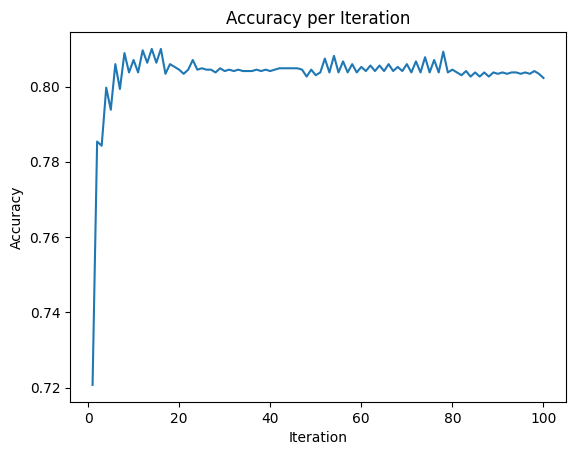

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Dataset-Hotel+Booking+Cancellation+Prediction.csv')

# Data preprocessing
# Convert 'booking_status' to binary (1 for Canceled, 0 for Not_Canceled)
df['booking_status'] = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

# Selecting features and target variable
X = df.drop('booking_status', axis=1)
y = df['booking_status']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Logistic Regression with warm_start=True
logreg = LogisticRegression(warm_start=True, max_iter=1)

# Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', logreg)])

# Iteratively train the model and record the accuracy
iterations = 100
accuracy_scores = []

for iter in range(iterations):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Iteration {iter+1}, Accuracy: {accuracy}")

# Plotting the accuracy for each iteration
plt.plot(range(1, iterations + 1), accuracy_scores)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy per Iteration')
plt.show()


**Random Forest Model**

In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load the dataset (make sure to upload the dataset to Colab or adjust the path accordingly)

file_path = '/content/Dataset-Hotel+Booking+Cancellation+Prediction.csv'  # Replace with your dataset path
hotel_data = pd.read_csv(file_path)

# Preprocessing
# Encoding categorical variables
le = LabelEncoder()
categorical_cols = hotel_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    hotel_data[col] = le.fit_transform(hotel_data[col])

# Separating the features and the target variable
X = hotel_data.drop(['booking_status', 'Booking_ID'], axis=1)  # Exclude 'Booking_ID'
y = hotel_data['booking_status']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("ROC-AUC Score:", roc_auc)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8847850055126791
ROC-AUC Score: 0.9353267435475014
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82       600
           1       0.90      0.93      0.92      1214

    accuracy                           0.88      1814
   macro avg       0.88      0.86      0.87      1814
weighted avg       0.88      0.88      0.88      1814



Store and dowload the model

In [11]:
import joblib



# Export the model to a file (replace 'model_filename.pkl' with your desired filename)
joblib.dump(model, 'model_filename.pkl')



['model_filename.pkl']

In [8]:
from google.colab import files

# Replace 'model_filename.pkl' with the actual filename
files.download('model_filename.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Use previously created model

In [13]:
import torch
# Load the saved RandomForestClassifier model (replace 'model_filename.pkl' with the actual path to your saved model)
model = joblib.load('model_filename.pkl')


In [23]:
import pandas as pd
import joblib

# Load the trained Random Forest model
model_filename = 'model_filename.pkl'  # Make sure the path is correct
rf_model = joblib.load(model_filename)

# Example new data point for prediction
# Note: The features should match the model's training data, excluding the target variable 'booking_status'
new_data = {
    'no_of_adults': [2],
    'no_of_children': [0],
    'no_of_weekend_nights': [1],
    'no_of_week_nights': [2],
    'type_of_meal_plan': [1],  # Assume encoded value
    'required_car_parking_space': [0],
    'room_type_reserved': [2],  # Assume encoded value
    'lead_time': [100],
    'arrival_year': [2024],
    'arrival_month': [6],
    'arrival_date': [15],
    'market_segment_type': [1],  # Assume encoded value
    'repeated_guest': [0],
    'no_of_previous_cancellations': [0],
    'no_of_previous_bookings_not_canceled': [0],
    'avg_price_per_room': [120.00],
    'no_of_special_requests': [2]
}
new_data_df = pd.DataFrame(new_data)

# Predict the booking status for the new data point
predicted_status = rf_model.predict(new_data_df)

# Since the booking status is encoded, you'll need to map the prediction back to the original label if necessary
# For example, if 0 and 1 were the encoded classes for 'Not Canceled' and 'Canceled' respectively:
status_mapping = {0: 'Not Canceled', 1: 'Canceled'}
predicted_status_label = [status_mapping[pred] for pred in predicted_status]

print(f'Predicted Booking Status: {predicted_status_label[0]}')


Predicted Booking Status: Not Canceled


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


**ANN model**

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score

train_loss_history = []
# Load and preprocess the data
file_path = '/content/Dataset-Hotel+Booking+Cancellation+Prediction.csv'   # Replace with your dataset path
hotel_data = pd.read_csv(file_path)

# Encode categorical variables
le = LabelEncoder()
categorical_cols = hotel_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    hotel_data[col] = le.fit_transform(hotel_data[col])

# Separate features and target
X = hotel_data.drop(['booking_status', 'Booking_ID'], axis=1).values
y = hotel_data['booking_status'].values

# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Neural Network Architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 16)  # Number of features as input size
        self.fc2 = nn.Linear(16, 16)

        self.fc3b = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 16)  # Adding an extra layer with ReLU activation
        self.fc4 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3b(x))
        x = self.relu(self.fc3(x))  # Adding ReLU activation between fc2 and fc3
        x = self.sigmoid(self.fc4(x))
        return x

# Initialize the model, optimizer, and loss function
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

# Training Loop
for epoch in range(10000):  # Number of epochs
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output.squeeze(), y_train)
    loss.backward()
    optimizer.step()

    # Append the loss to the history list
    train_loss_history.append(loss.item())

    if epoch % 100 == 0:  # Print loss every 100 epochs
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()
plt.grid()
plt.show()

# Evaluate the model
#model.eval()
#with torch.no_grad():
#    y_pred = model(X_test).squeeze()
#    y_pred = torch.round(y_pred)  # Convert probabilities to binary predictions
#    accuracy = torch.sum(y_pred == y_test) / float(len(y_test))
#    print(f'Test Accuracy: {accuracy.item()}')


# Evaluate ANN model
model.eval()
with torch.no_grad():
    ann_y_pred = model(X_test).squeeze()
    ann_y_pred = torch.round(ann_y_pred)
    ann_accuracy = accuracy_score(y_test, ann_y_pred.numpy())
    ann_roc_auc = roc_auc_score(y_test, model(X_test).numpy())
    ann_f1 = f1_score(y_test, ann_y_pred.numpy())
    ann_precision = precision_score(y_test, ann_y_pred.numpy())
    ann_recall = recall_score(y_test, ann_y_pred.numpy())

# Print the evaluation metrics
print(f'Test Accuracy: {ann_accuracy}')
print(f'ROC AUC Score: {ann_roc_auc}')
print(f'F1 Score: {ann_f1}')

# Print results
#print("RandomForestClassifier:")
#print("Cross-Validation Accuracy:", np.mean(rf_scores))
#print("Test Accuracy:", rf_accuracy)
#rint("Test ROC-AUC Score:", rf_roc_auc)
#print("Test F1 Score:", rf_f1)


print("\nANN with PyTorch:")
print("Test Accuracy:", ann_accuracy)
print("Test ROC-AUC Score:", ann_roc_auc)
print("Test F1 Score:", ann_f1)
print("Test Recall:", ann_recall)
print("Test Precision:", ann_precision)

Epoch 0, Loss: 0.6932587623596191
Epoch 100, Loss: 0.5051435232162476
Epoch 200, Loss: 0.4231577515602112
Epoch 300, Loss: 0.3869122564792633
Epoch 400, Loss: 0.3663317561149597
Epoch 500, Loss: 0.3478470742702484
Epoch 600, Loss: 0.3322908282279968
Epoch 700, Loss: 0.3180440068244934
Epoch 800, Loss: 0.3060854375362396
Epoch 900, Loss: 0.2984919846057892
Epoch 1000, Loss: 0.29354020953178406
Epoch 1100, Loss: 0.2900479733943939
Epoch 1200, Loss: 0.285746306180954
Epoch 1300, Loss: 0.28146880865097046
Epoch 1400, Loss: 0.2785814106464386
Epoch 1500, Loss: 0.27634158730506897
Epoch 1600, Loss: 0.2743270695209503
Epoch 1700, Loss: 0.27183571457862854
Epoch 1800, Loss: 0.2691805064678192
Epoch 1900, Loss: 0.26690855622291565
Epoch 2000, Loss: 0.26470285654067993
Epoch 2100, Loss: 0.26255813241004944
Epoch 2200, Loss: 0.2612396776676178
Epoch 2300, Loss: 0.25967642664909363
Epoch 2400, Loss: 0.25855955481529236
Epoch 2500, Loss: 0.2574734389781952
Epoch 2600, Loss: 0.2565227746963501
Epoch

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Load the dataset (replace 'your_dataset_path.csv' with the actual path)
file_path = '/content/Dataset-Hotel+Booking+Cancellation+Prediction.csv'
hotel_data = pd.read_csv(file_path)

# Encode categorical variables
le = LabelEncoder()
categorical_cols = hotel_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    hotel_data[col] = le.fit_transform(hotel_data[col])

# Separate features and target
X = hotel_data.drop(['booking_status', 'Booking_ID'], axis=1)
y = hotel_data['booking_status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
rf_f1 = f1_score(y_test, rf_y_pred)

# ANN with PyTorch
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train_scaled.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Initialize ANN model
ann_model = Net()
criterion = nn.BCELoss()
optimizer = optim.Adam(ann_model.parameters(), lr=0.001)

# Train ANN model
for epoch in range(100):
    ann_model.train()
    optimizer.zero_grad()
    output = ann_model(X_train_tensor)
    loss = criterion(output.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluate ANN model
ann_model.eval()
with torch.no_grad():
    ann_y_pred = ann_model(X_test_tensor).squeeze()
    ann_y_pred = torch.round(ann_y_pred)
    ann_accuracy = accuracy_score(y_test_tensor, ann_y_pred.numpy())
    ann_roc_auc = roc_auc_score(y_test_tensor, ann_model(X_test_tensor).numpy())
    ann_f1 = f1_score(y_test_tensor, ann_y_pred.numpy())

# Print results
print("RandomForestClassifier:")
print("Cross-Validation Accuracy:", np.mean(rf_scores))
print("Test Accuracy:", rf_accuracy)
print("Test ROC-AUC Score:", rf_roc_auc)
print("Test F1 Score:", rf_f1)

print("\nANN with PyTorch:")
print("Test Accuracy:", ann_accuracy)
print("Test ROC-AUC Score:", ann_roc_auc)
print("Test F1 Score:", ann_f1)


RandomForestClassifier:
Cross-Validation Accuracy: 0.8759476223294278
Test Accuracy: 0.8847850055126791
Test ROC-AUC Score: 0.9353267435475014
Test F1 Score: 0.9156918112141993

ANN with PyTorch:
Test Accuracy: 0.8037486218302095
Test ROC-AUC Score: 0.8699430258099945
Test F1 Score: 0.8573717948717949


<ipython-input-6-dbe1e00bae17>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = input_features.corr()


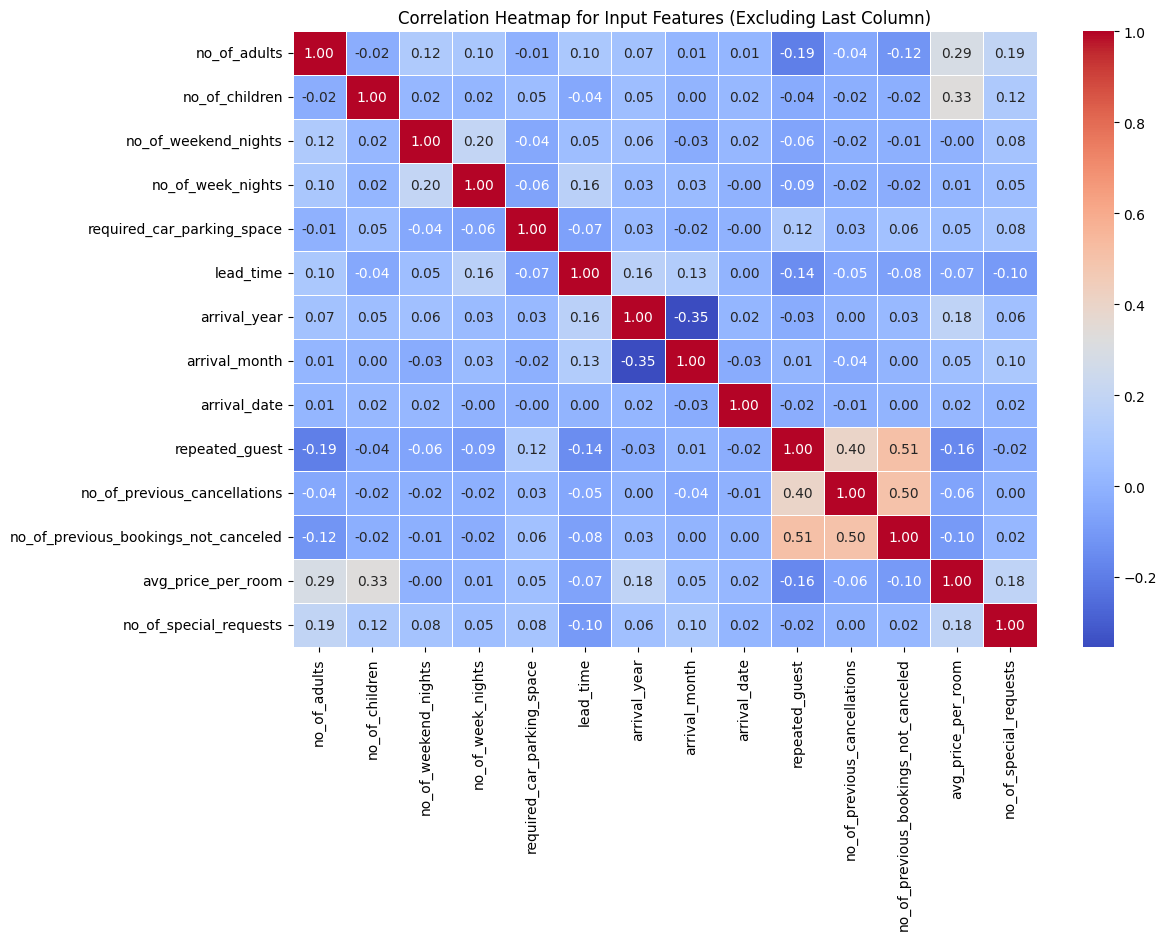

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive if your dataset is stored there
# from google.colab import drive
# drive.mount('/content/drive')

# Load the dataset (replace 'your_dataset_path.csv' with the actual path)
file_path = '/content/Dataset-Hotel+Booking+Cancellation+Prediction.csv'
hotel_data = pd.read_csv(file_path)




# Exclude the last column (assuming it's the target variable)
input_features = hotel_data.iloc[:, :-1]

# Create a correlation matrix for input features
correlation_matrix = input_features.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Input Features (Excluding Last Column)")
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
import numpy as np
# Load the dataset (replace 'your_dataset_path.csv' with the actual path)
file_path = '/content/Dataset-Hotel+Booking+Cancellation+Prediction.csv'
hotel_data = pd.read_csv(file_path)


# Exclude the target variable "booking_status" from the analysis
input_features = hotel_data.drop(columns=['booking_status'])

# Initialize lists to store results
categorical_attributes = []
numeric_attributes = []
significant_results = []

# Loop through attributes
for column in input_features.columns:
    # Categorical attributes: Perform Chi-squared test
    if input_features[column].dtype == 'object':
        contingency_table = pd.crosstab(hotel_data['booking_status'], input_features[column])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        categorical_attributes.append(column)
        if p < 0.05:  # Adjust significance level as needed
            significant_results.append(f"{column}: Significant (p-value = {p:.4f})")
        else:
            significant_results.append(f"{column}: Not Significant (p-value = {p:.4f})")

    # Numeric attributes: Perform t-test or ANOVA
    else:
        groups = [group_data[column] for name, group_data in hotel_data.groupby('booking_status')]
        if len(groups) == 2:
            t_stat, p = ttest_ind(*groups)
            mean_diff = np.abs(np.mean(groups[0]) - np.mean(groups[1]))
            std_pooled = np.sqrt(((len(groups[0]) - 1) * np.var(groups[0]) + (len(groups[1]) - 1) * np.var(groups[1])) / (len(groups[0]) + len(groups[1]) - 2))
            margin_of_error = 1.96 * std_pooled / np.sqrt(len(groups[0]) + len(groups[1]))
            confidence_interval = (mean_diff - margin_of_error, mean_diff + margin_of_error)
        else:
            f_stat, p = f_oneway(*groups)
            # Calculate confidence intervals for each group mean (numeric attribute)
            group_means = [np.mean(group) for group in groups]
            group_sizes = [len(group) for group in groups]
            std_errs = [np.std(group, ddof=1) / np.sqrt(len(group)) for group in groups]
            confidence_intervals = []
            for mean, std_err, size in zip(group_means, std_errs, group_sizes):
                z_critical = 1.96  # Z-score for 95% confidence interval
                margin_of_error = z_critical * (std_err / np.sqrt(size))
                confidence_interval = (mean - margin_of_error, mean + margin_of_error)
                confidence_intervals.append(confidence_interval)

        numeric_attributes.append(column)
        if p < 0.05:  # Adjust significance level as needed
            if len(groups) == 2:
                significant_results.append(f"{column}: Significant (p-value = {p:.4f}), Confidence Interval: {confidence_interval}")
            else:
                significant_results.append(f"{column}: Significant (p-value = {p:.4f}), Confidence Intervals: {confidence_intervals}")
        else:
            if len(groups) == 2:
                significant_results.append(f"{column}: Not Significant (p-value = {p:.4f}), Confidence Interval: {confidence_interval}")
            else:
                significant_results.append(f"{column}: Not Significant (p-value = {p:.4f}), Confidence Intervals: {confidence_intervals}")

# Display the results
for result in significant_results:
    print(result)


Booking_ID: Not Significant (p-value = 0.4951)
no_of_adults: Significant (p-value = 0.0000), Confidence Interval: (0.08873210353763902, 0.10991185596196931)
no_of_children: Significant (p-value = 0.0064), Confidence Interval: (0.016657118332779247, 0.03361191392934487)
no_of_weekend_nights: Significant (p-value = 0.0000), Confidence Interval: (0.09123157039569867, 0.12726627567927623)
no_of_week_nights: Significant (p-value = 0.0000), Confidence Interval: (0.2976308326399716, 0.3570271440691787)
type_of_meal_plan: Significant (p-value = 0.0000)
required_car_parking_space: Significant (p-value = 0.0000), Confidence Interval: (0.02941028836196075, 0.036427631691504585)
room_type_reserved: Not Significant (p-value = 0.1553)
lead_time: Significant (p-value = 0.0000), Confidence Interval: (79.47464707906593, 82.66594075485372)
arrival_year: Significant (p-value = 0.0000), Confidence Interval: (0.15108178767690644, 0.16685792450112474)
arrival_month: Significant (p-value = 0.0263), Confidenc

In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, confusion_matrix

# Load the dataset
df = pd.read_csv('/content/Dataset-Hotel+Booking+Cancellation+Prediction.csv')

# Preprocess the data (assuming 'target_column' is your target variable)
# Encode categorical variables if necessary
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# Split the data into features and target
X = df.drop('booking_status', axis=1)
y = df['booking_status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

model = DecisionTreeClassifier(random_state=42, ccp_alpha=0.02)
model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Predict and evaluate the model
predictions = model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Calculate other metrics
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
# Add other metrics like roc_auc_score, f1_score, recall_score, precision_score as needed

Accuracy: 0.7651598676957001
Confusion Matrix:
 [[459 141]
 [285 929]]
F1 Score: 0.8134851138353765
Precision: 0.8682242990654205
Recall: 0.7652388797364086
Accuracy: 0.7651598676957001


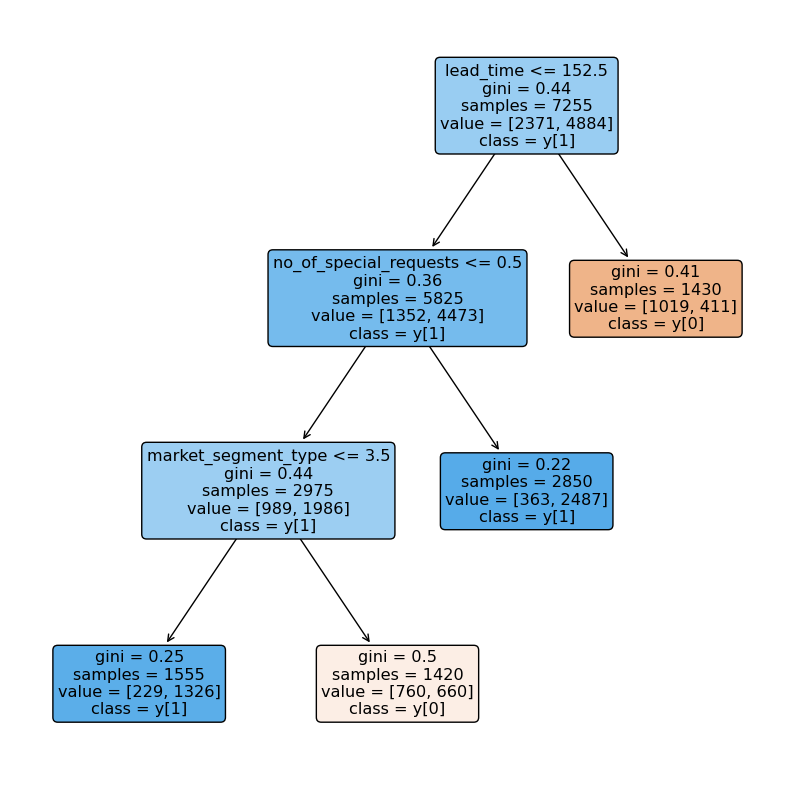

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'model' is your trained Decision Tree model

# Visualize the decision tree
plt.figure(figsize=(10,10))
plot_tree(model,
          filled=True,
          feature_names=X.columns,
          class_names=True,
          impurity=True,
          rounded=True,
          proportion=False,
          precision=2)
plt.show()



In [ ]:
pip install graphviz

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a dot file
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,
                           class_names=str(le.classes_),
                           filled=True, rounded=True,
                           special_characters=True)

# Use graphviz to visualize the tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # This will save the tree in a file
graph.view()

'decision_tree.pdf'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/Dataset-Hotel+Booking+Cancellation+Prediction.csv')

# Preprocess the data
# ... [data preprocessing steps here]

# Split the data into features and target
X = df.drop('target_column', axis=1)
y = df['target_column']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
# Adjust the parameters like max_depth, min_samples_split, min_samples_leaf as needed
rf_model = RandomForestClassifier(random_state=42, max_depth=10, min_samples_split=4, min_samples_leaf=2)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


KeyError: "['target_column'] not found in axis"

In [ ]:
X


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,1,0,0,2,0,188,2018,6,15,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,2,0,103,2018,4,19,0,...,0,0,0,0,0,0,0,1,0,0
2,2,0,1,4,0,33,2018,4,18,0,...,0,0,0,0,0,0,0,0,1,0
3,2,0,0,3,0,64,2018,11,22,0,...,0,0,0,0,0,0,0,0,1,0
4,2,0,1,1,0,247,2018,6,6,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9064,2,0,0,4,0,15,2018,11,1,0,...,0,0,0,0,0,0,0,0,1,1
9065,2,0,0,3,0,232,2018,9,15,0,...,0,0,0,0,0,0,0,1,0,1
9066,2,0,0,1,0,4,2018,2,20,0,...,0,0,0,0,0,0,0,0,1,1
9067,2,0,2,1,0,33,2018,11,20,0,...,0,0,0,0,0,0,0,1,0,1


Column names in the dataset:
['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']


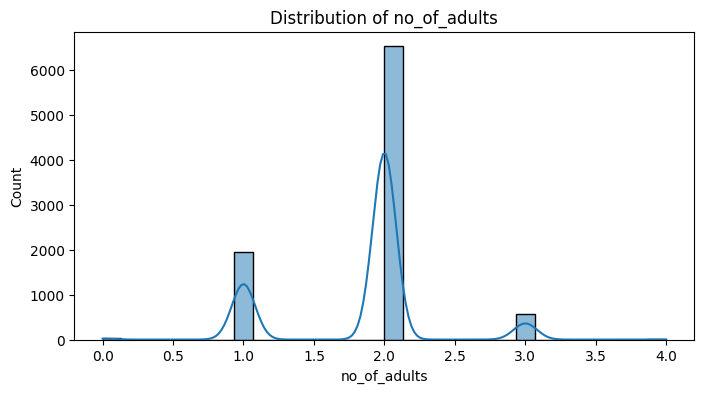

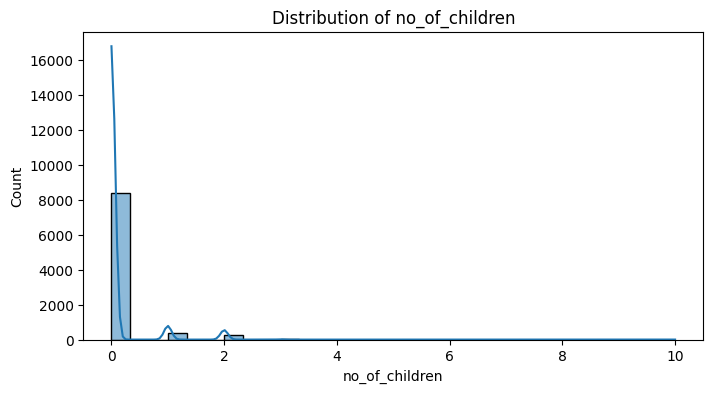

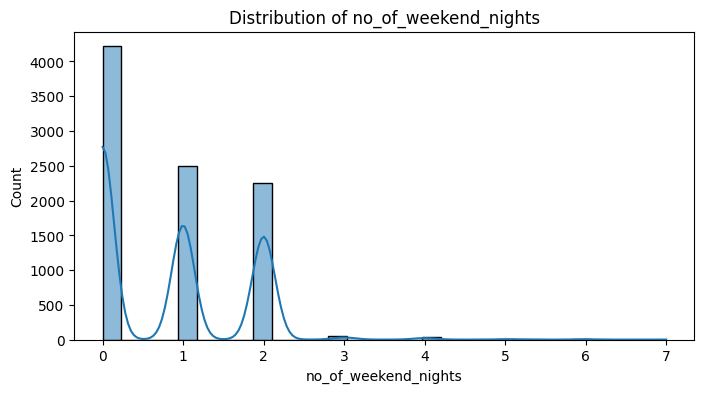

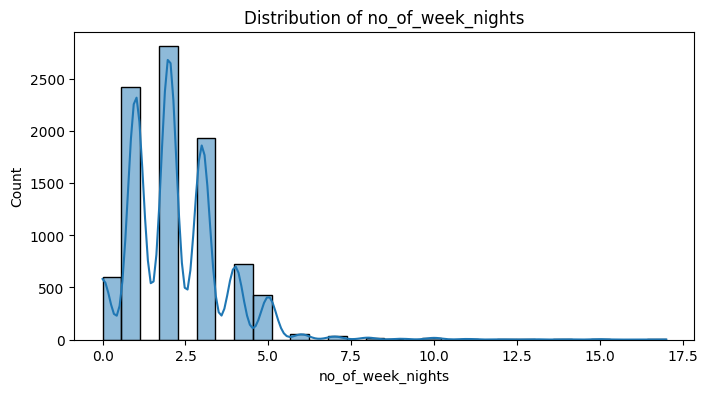

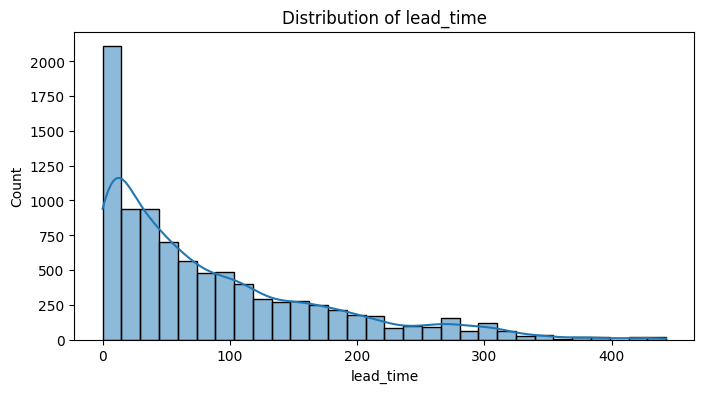

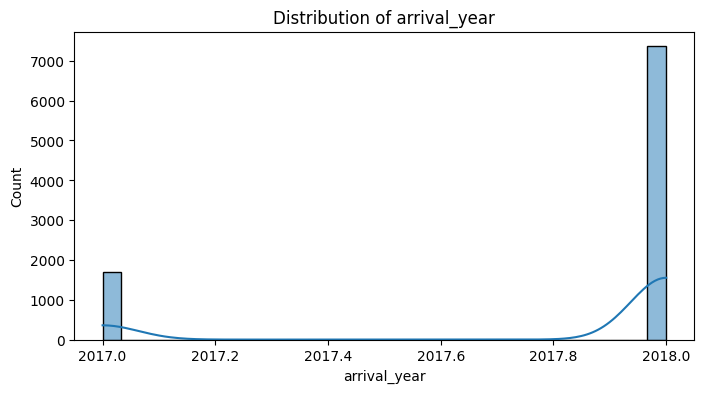

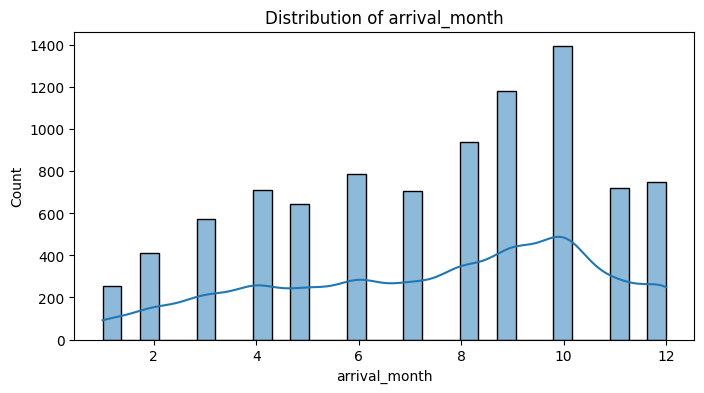

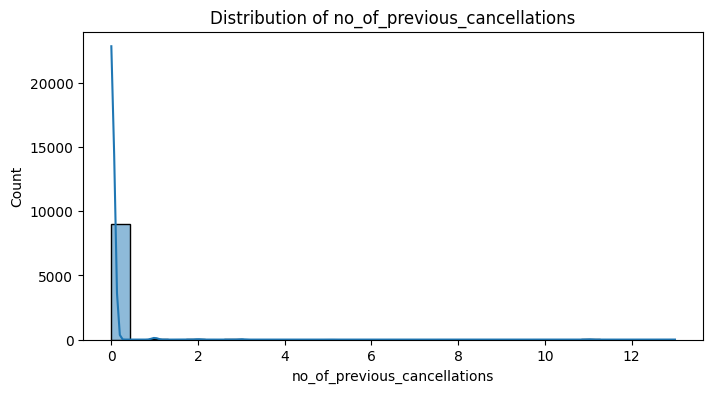

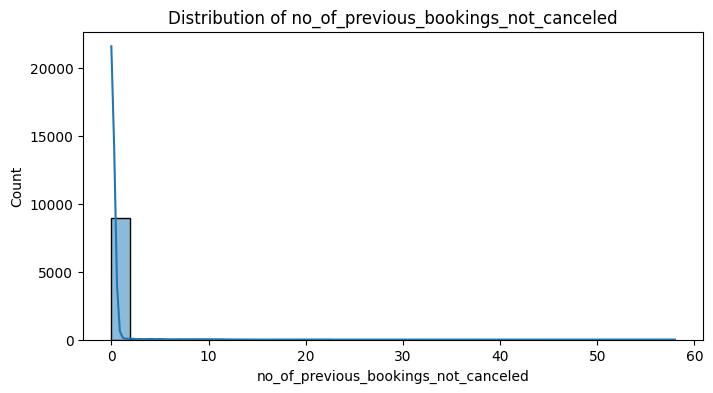

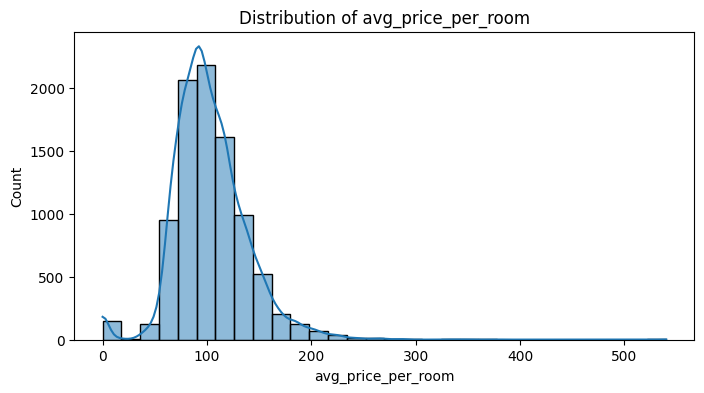

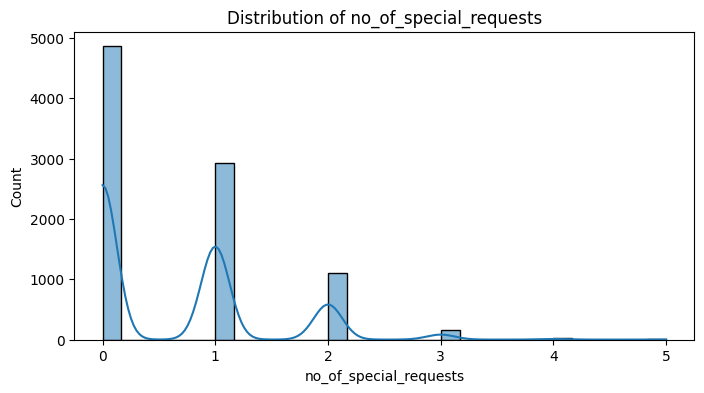

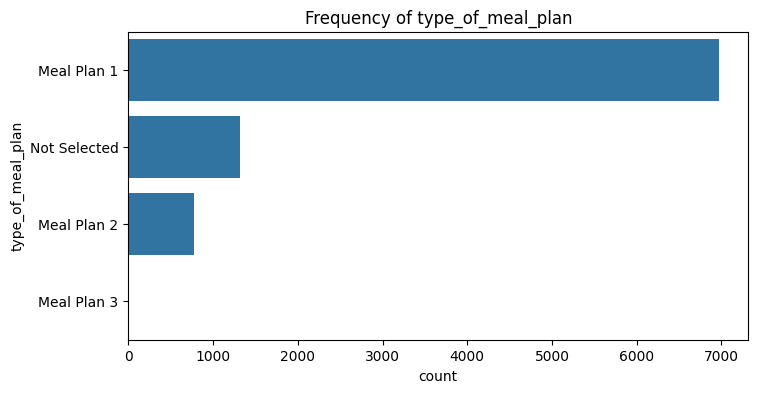

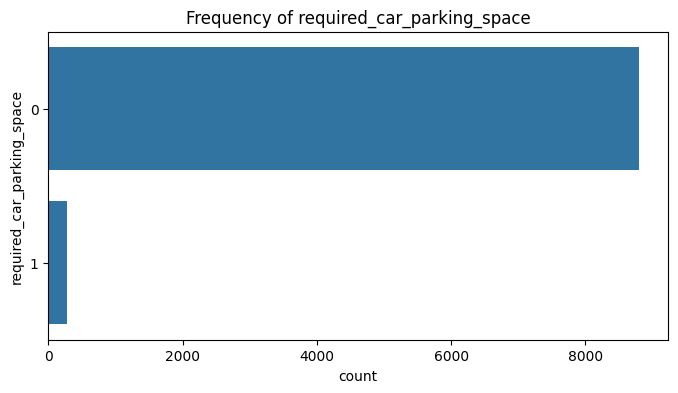

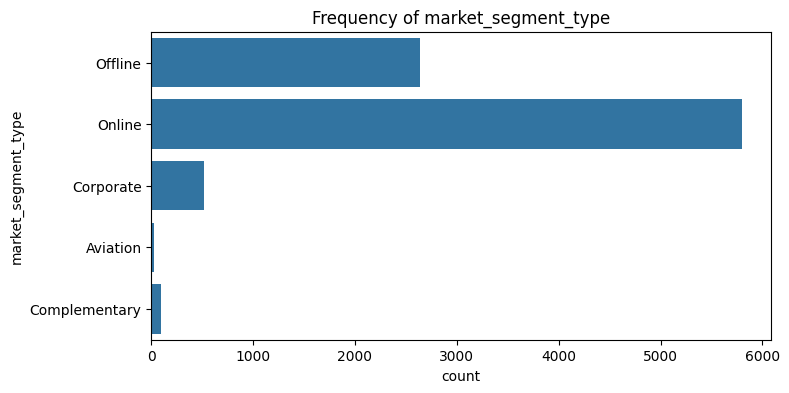

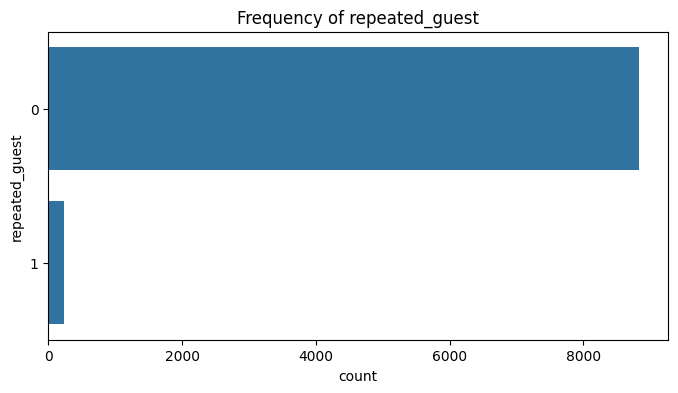

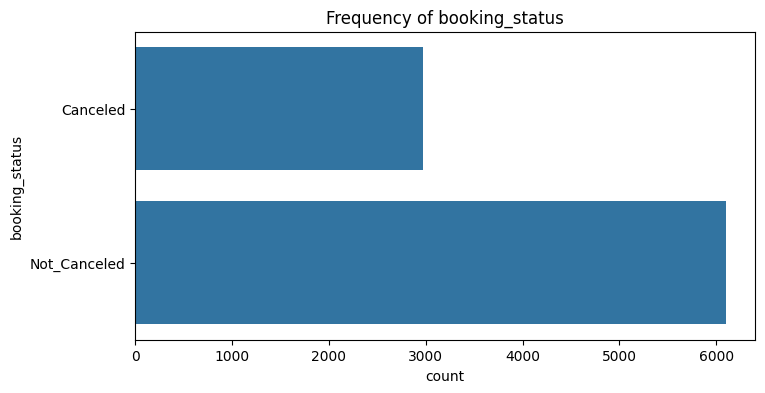

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset

file_path = '/content/Dataset-Hotel+Booking+Cancellation+Prediction.csv'
data = pd.read_csv(file_path, delimiter=',')

# List of numerical and categorical variables
numerical_variables = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                       'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month',
                       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                       'avg_price_per_room', 'no_of_special_requests']
categorical_variables = ['type_of_meal_plan', 'required_car_parking_space',
                         'market_segment_type', 'repeated_guest','booking_status']


print("Column names in the dataset:")
print(data.columns.tolist())

# Univariate Analysis for Numerical Variables
for var in numerical_variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
    plt.show()

# Univariate Analysis for Categorical Variables
for var in categorical_variables:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=var, data=data)
    plt.title(f'Frequency of {var}')
    plt.show()


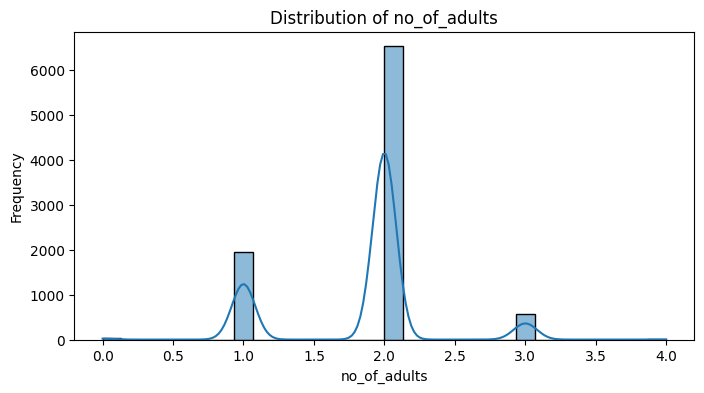

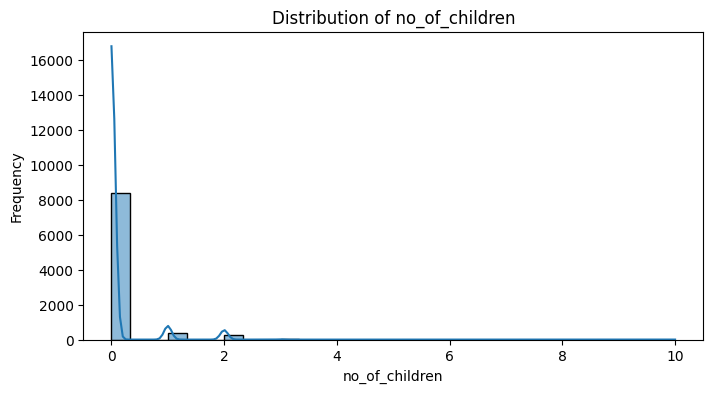

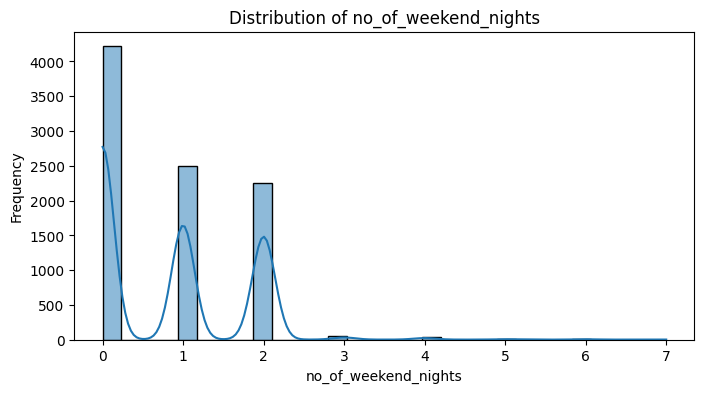

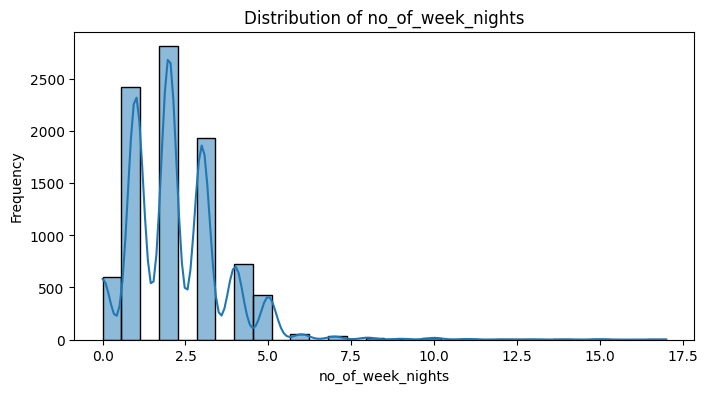

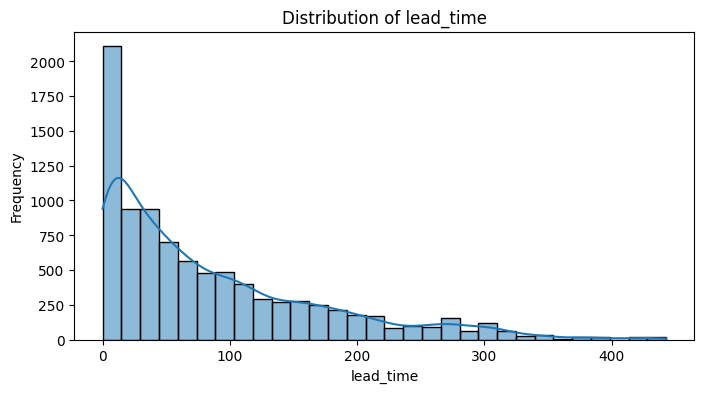

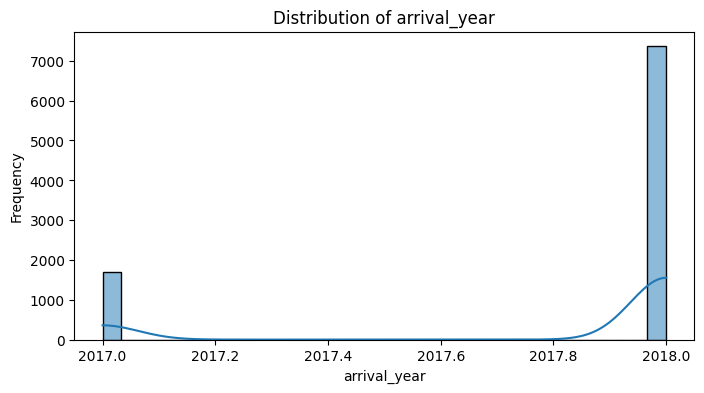

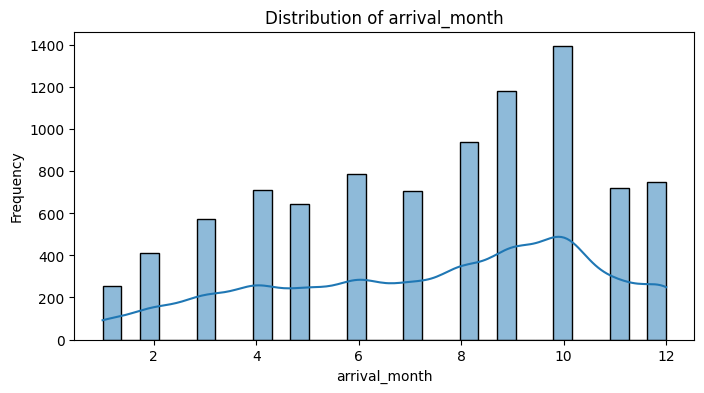

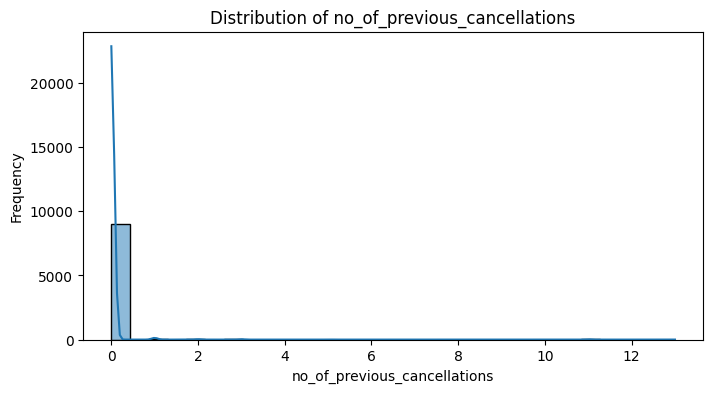

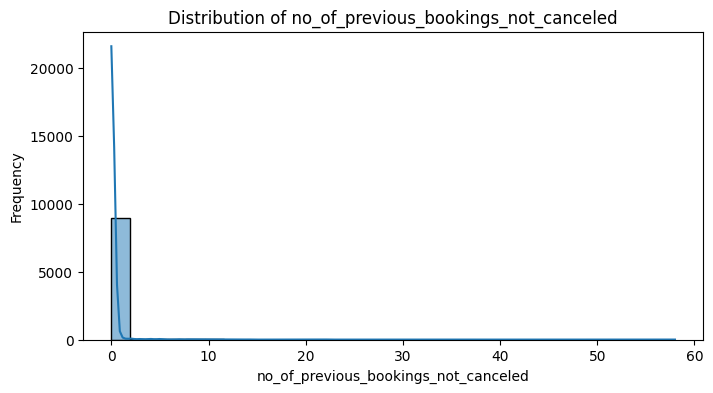

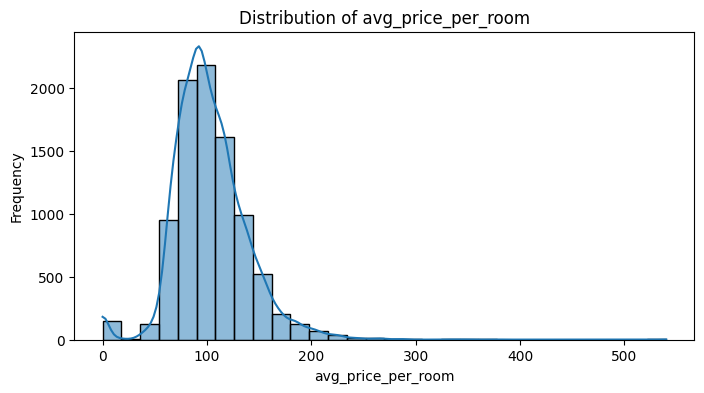

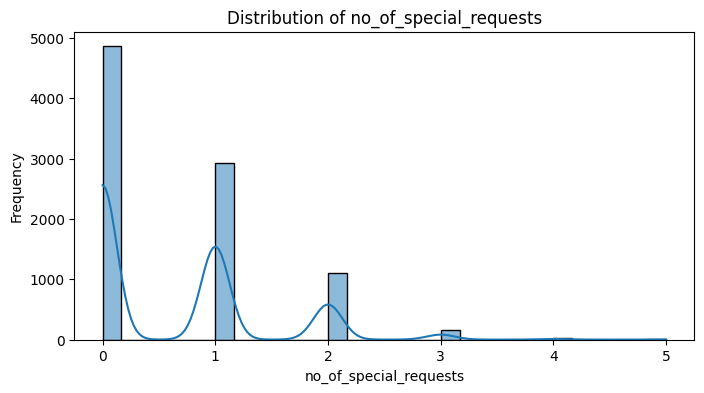

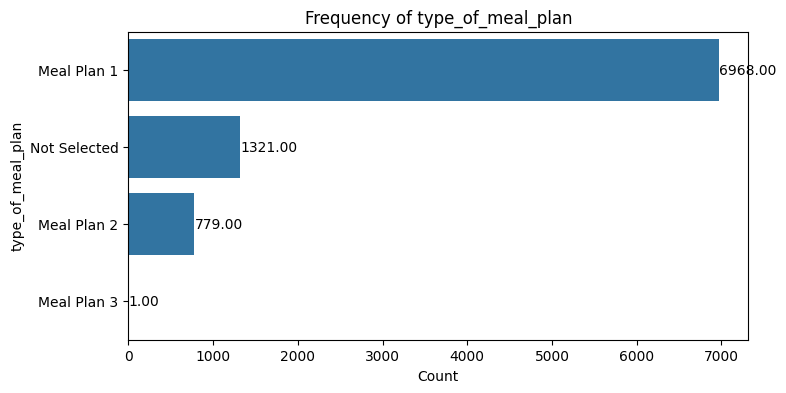

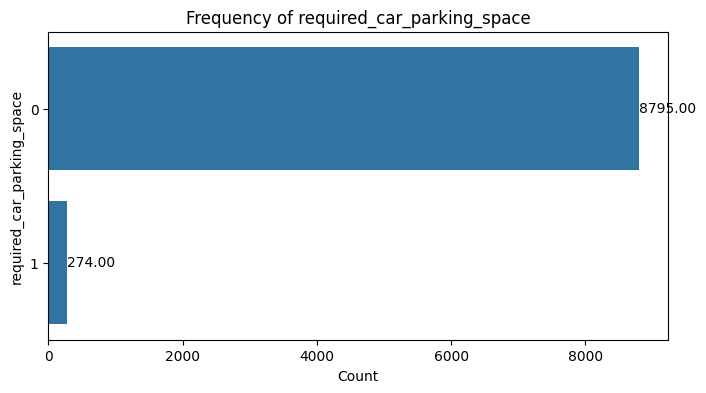

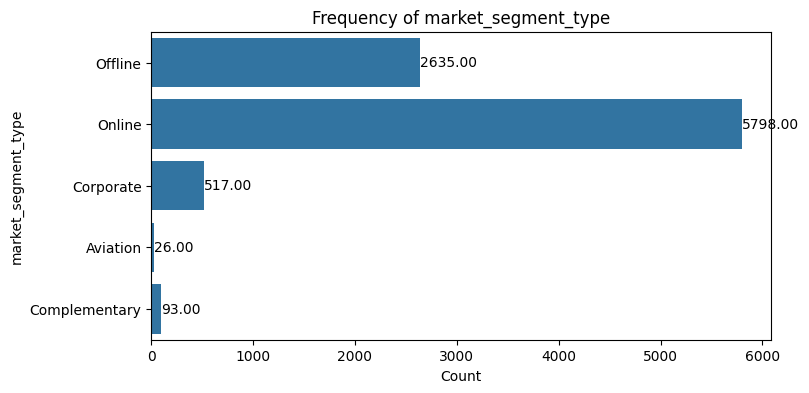

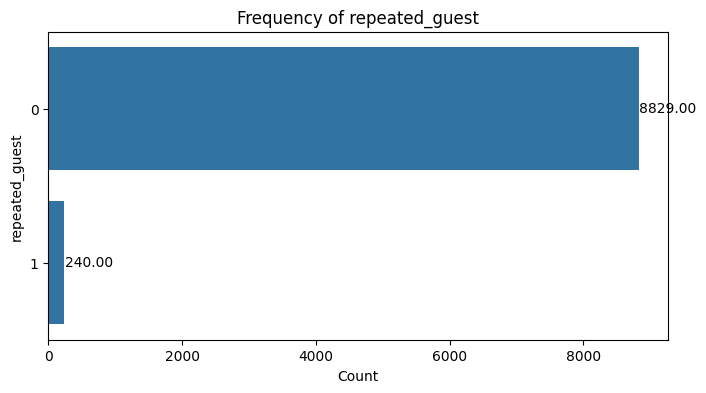

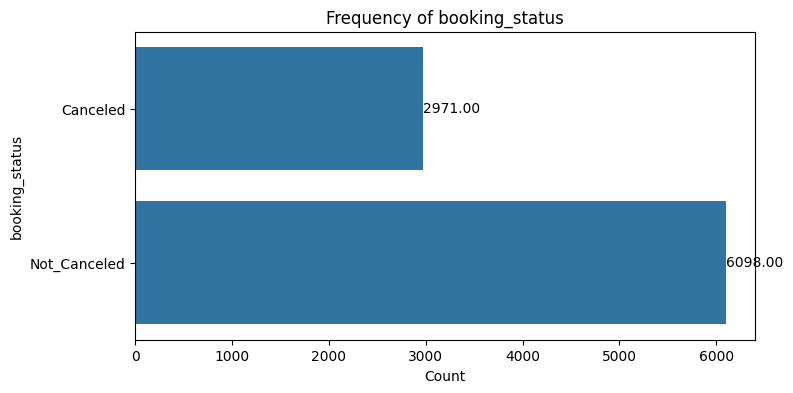

In [ ]:
for var in numerical_variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)  # X-axis label
    plt.ylabel('Frequency')  # Y-axis label
    plt.show()

# Univariate Analysis for Categorical Variables
for var in categorical_variables:
    plt.figure(figsize=(8, 4))
    bar_plot = sns.countplot(y=var, data=data)
    plt.title(f'Frequency of {var}')
    plt.xlabel('Count')  # X-axis label
    plt.ylabel(var)  # Y-axis label

    # Adding value labels to each bar in the bar chart
    for p in bar_plot.patches:
        width = p.get_width()    # get bar length
        plt.text(width + 3,       # set the text at 1 unit right of the bar
                 p.get_y() + p.get_height() / 2, # get Y coordinate + half of bar height
                 '{:1.2f}'.format(width), # set variable to display, 2 decimals format
                 ha = 'left',   # horizontal alignment
                 va = 'center')  # vertical alignment

    plt.show()

In [ ]:
# Import necessary library
import pandas as pd


# Calculate summary statistics
summary_statistics = data[numerical_variables].describe()

# Calculating additional statistics: median and mode
median = data[numerical_variables].median()
mode = data[numerical_variables].mode().iloc[0]

# Adding Median and Mode to the summary statistics
summary_statistics = summary_statistics.append(median.rename('median'))
summary_statistics = summary_statistics.append(mode.rename('mode'))

# Display summary statistics
print(summary_statistics)


        no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count    9069.000000     9069.000000           9069.000000        9069.000000   
mean        1.841328        0.106627              0.812438           2.209725   
std         0.516669        0.412087              0.876968           1.451202   
min         0.000000        0.000000              0.000000           0.000000   
25%         2.000000        0.000000              0.000000           1.000000   
50%         2.000000        0.000000              1.000000           2.000000   
75%         2.000000        0.000000              2.000000           3.000000   
max         4.000000       10.000000              7.000000          17.000000   
median      2.000000        0.000000              1.000000           2.000000   
mode        2.000000        0.000000              0.000000           2.000000   

          lead_time  arrival_year  arrival_month  \
count   9069.000000   9069.000000    9069.000000   
mean

<ipython-input-4-d93a05a304d6>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_statistics = summary_statistics.append(median.rename('median'))
<ipython-input-4-d93a05a304d6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_statistics = summary_statistics.append(mode.rename('mode'))


In [ ]:
# Export the summary statistics to an Excel file
output_excel_path = 'summary_statistics.xlsx'  # Choose a file path for the Excel output
summary_statistics.to_excel(output_excel_path)

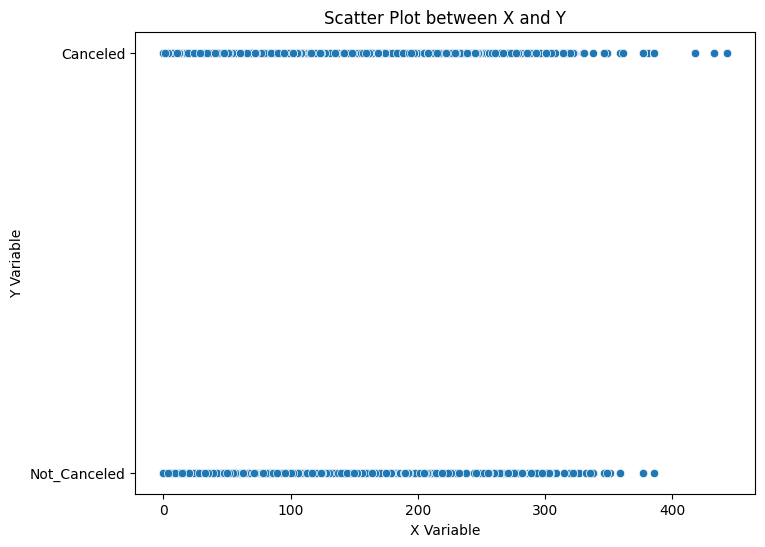

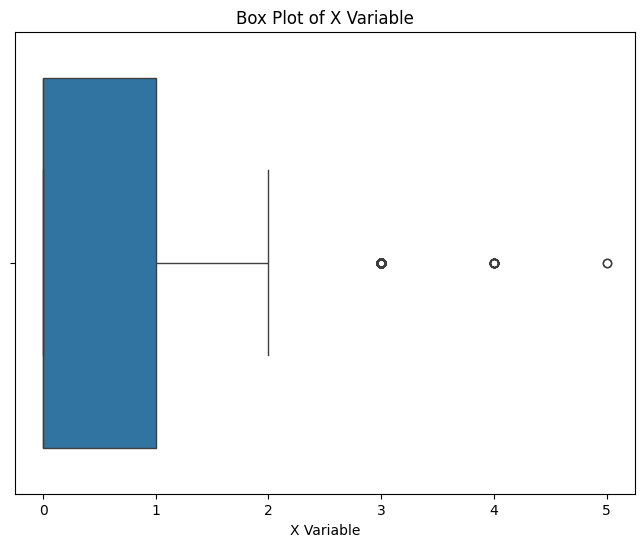

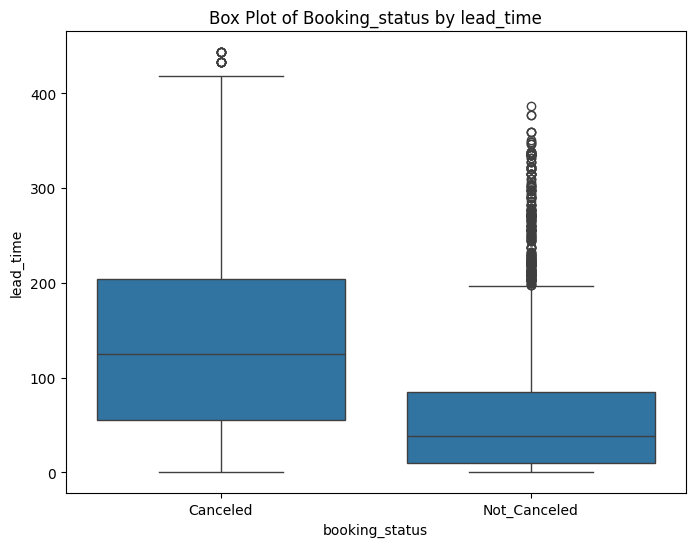

In [ ]:

data = pd.read_csv(file_path, delimiter=',')

# Create a scatter plot

plt.figure(figsize=(8, 6))
sns.scatterplot(x='lead_time', y='booking_status', data=data)
plt.title('Scatter Plot between X and Y')
plt.xlabel('X Variable')
plt.ylabel('Y Variable')
plt.show()

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='no_of_special_requests', data=data)
plt.title('Box Plot of X Variable')
plt.xlabel('X Variable')
plt.show()

# If you want to create a box plot for a specific category, you can add 'hue'
# For example, if you have a categorical variable 'category' and want to see box plots for X within each category:
plt.figure(figsize=(8, 6))
sns.boxplot(x='booking_status', y='lead_time', data=data)
plt.title('Box Plot of Booking_status by lead_time')
plt.xlabel('booking_status')
plt.ylabel('lead_time')
plt.show()


In [ ]:
# Choose the variable for the box plot
boxplot_variable = 'lead_time'  # Replace with your numerical variable name

# Create a box plot for canceled bookings
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y=numerical_variable, data=data[data['booking_status'] == 'canceled'])
plt.title(f'Box Plot of {numerical_variable} for Canceled Bookings')
plt.xlabel('Booking Status')
plt.ylabel(numerical_variable)

# Calculate and print the median for canceled bookings
median_canceled = data[data['booking_status'] == 'canceled'][numerical_variable].median()
print(f'Median for Canceled Bookings: {median_canceled}')

# Create a box plot for not canceled bookings
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y=numerical_variable, data=data[data['booking_status'] == 'not_canceled'])
plt.title(f'Box Plot of {numerical_variable} for Not Canceled Bookings')
plt.xlabel('Booking Status')
plt.ylabel(numerical_variable)

# Calculate and print the median for not canceled bookings
median_not_canceled = data[data['booking_status'] == 'not_canceled'][numerical_variable].median()
print(f'Median for Not Canceled Bookings: {median_not_canceled}')

# Show the plots
plt.show()

NameError: name 'numerical_variable' is not defined

<Figure size 1000x600 with 0 Axes>